# Predicting the likelihood of sub-Saharan African countries experiencing civil conflict by observing the shocks to economic growth


## INTRODUCTION

This project is based on the data from Miguel, Edward; Satyanath, Shanker; Sergenti, Ernest, 2014, "Replication data for: Economic Shocks and Civil Conflict: An Instrumental Variables Approach". In this paper, the authors analyse the relationship between economic shocks and civil conflict in Sub-Saharan African countries from 1981-99. The objective of the paper was to observe if economic growth rates determine the outcome of civil conflict.  The authors have analysed many sub-groups of outcome variable, but we will only analyse __'any_prio'__ as a dependent variable which denotes any kind of internal conflict that has taken place. From the data, we will use only these control variables such as:  
* __LPOPL1 -__
Log of population lagged one year, with 0 for start of country series.
Source: Fearon and Laitin (2003) 
* __POLITY2L -__
Polity2 is revised polity score lagged one year, with 0 for start of country series.
Source: Fearon and Laitin (2003)
* __LMTNEST -__
Log of Mtnest where Mtnest is percent mountainous terrain.
Source: Fearon and Laitin (2003)
* __OIL -__
Oil Exporters.
Source: Fearon and Laitin (2003)
* __ETHFRAC -__
Ethnic-linguistic fractionalization based on the Atlas Marodov Mira.
Source: Fearon and Laitin (2003)
* __RELFRAC -__
Religious Fractionalization.
Source: Fearon and Laitin (2003)
* __GDPEN -__
Per Capita GDP
Source: Fearon and Laitin (2003)
* __GDP_G -__
Per capita GDP Growth
Source: Fearon and Laitin (2003)
* __GDP_G_L -__
GDP_G lagged one year.
Source: Fearon and Laitin (2003)
* __YEAR -__
From 1981-99

The goal of this project is to compare and check which statistical  method is best for predicting the likelihood of civil conflict. By analyzing different statistical methods, we can determine their effectiveness in predicting civil conflict and identify the most accurate approach.
First, we start with importing standard packages and checking the data.


In [1]:
import pandas as pd
from matplotlib.pyplot import subplots
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from ISLP.models import (ModelSpec as MS,
                         summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
data = pd.read_excel('Tabular Data.xlsx',usecols=['any_prio','gdp_g','gdp_g_l','polity2l','ethfrac','relfrac','Oil','lmtnest','lpopl1','year','country_code'],index_col=(1,0))
data['any_prio'] = np.where(data["any_prio"] == 0, 'No', 'Yes')
years = data.index.get_level_values('year').to_list()
data['year'] = years
data['Oil']=pd.Categorical(data['Oil'])
print('Number of observations :',data.shape[0])
data[:290]


Number of observations : 743


any_prio     lpopl1   lmtnest Oil   ethfrac  relfrac  \
country_code year                                                        
GNB          1981       No   6.695799  0.000000   0  0.803757    0.545   
             1982       No   6.714170  0.000000   0  0.803757    0.545   
             1983       No   6.732211  0.000000   0  0.803757    0.545   
             1984       No   6.749931  0.000000   0  0.803757    0.545   
             1985       No   6.768493  0.000000   0  0.803757    0.545   
...                    ...        ...       ...  ..       ...      ...   
NGA          1989       No  11.417141  1.223775   1  0.868932    0.580   
             1990       No  11.445770  1.223775   1  0.868932    0.580   
             1991       No  11.474215  1.223775   1  0.868932    0.580   
             1992       No  11.502704  1.223775   1  0.868932    0.580   
             1993       No  11.532728  1.223775   1  0.868932    0.580   

                   polity2l     gdp_g   gdp_g_l  year  
country_code year                                      
GNB          1981        -7  0.216561 -0.152878  1981  
             1982        -7  0.104712  0.216561  1982  
             1983        -7 -0.042654  0.104712  1983  
             1984        -7  0.034653 -0.042654  1984  
             1985        -8  0.036683  0.034653  1985  
...                     ...       ...       ...   ...  
NGA          1989        -7  0.012766  0.043285  1989  
             1990        -5  0.045168  0.012766  1990  
             1991        -5  0.045226  0.045168  1991  
             1992        -5 -0.059615  0.045226  1992  
             1993        -5 -0.007316 -0.059615  1993  

[290 rows x 10 columns]

Next, we  will check if there is any missing data.

In [2]:
data.isna().sum().sum()

0

Since, there is no missing data. We can move  on to analyse the data. 
We will start off by checking the correlation between the variables.

In [3]:
data.corr(numeric_only=True)

,lpopl1,lmtnest,ethfrac,relfrac,polity2l,gdp_g,gdp_g_l,year
lpopl1,1.000000,0.292830,0.308754,0.407609,0.015321,-0.003169,-0.007789,0.134870
lmtnest,0.292830,1.000000,-0.398760,0.249697,-0.113527,0.011307,0.009360,0.006682
ethfrac,0.308754,-0.398760,1.000000,0.289918,0.019375,-0.014021,-0.013499,0.014631
relfrac,0.407609,0.249697,0.289918,1.000000,-0.085619,-0.008577,-0.005234,0.025737
polity2l,0.015321,-0.113527,0.019375,-0.085619,1.000000,0.032652,0.042317,0.359512
gdp_g,-0.003169,0.011307,-0.014021,-0.008577,0.032652,1.000000,0.031111,0.056196
gdp_g_l,-0.007789,0.009360,-0.013499,-0.005234,0.042317,0.031111,1.000000,0.055254
year,0.134870,0.006682,0.014631,0.025737,0.359512,0.056196,0.055254,1.000000


Seems like there is no significant correlation between the variables except population and religious fractions as higher population will have more religious diversity. Now, we will split the data by most common method which is 2/3 for training the model and remaining 1/3 for testing. So, for training we will use all the observations before 1994 and test it on the remaining observations. 

### LOGISTIC MODEL

First, we will use logistic model and see how accurately it predicts.

In [17]:
train= (data.year<1994)
x=MS(data.columns.drop(['any_prio','year'])).fit_transform(data)
y=data['any_prio']== 'Yes'
train_x, test_x = x.loc[train], x.loc[~train]
train_y,test_y =  y.loc[train],y.loc[~train]     
x=MS(data.columns.drop(['any_prio','year'])).fit_transform(data)
train_x, test_x = x.loc[train], x.loc[~train]
train_y,test_y =  y.loc[train],y.loc[~train]     
glm = sm.GLM(train_y,
             train_x,
             family=sm.families.Binomial())
results=glm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               any_prio   No. Observations:                  517
Model:                            GLM   Df Residuals:                      508
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -249.97
Date:                Thu, 16 Nov 2023   Deviance:                       499.94
Time:                        20:24:48   Pearson chi2:                     470.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1659
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -7.7697      0.998     -7.789      0.000      -9.725      -5.814
lpopl1         0.6943      0.127      5.447      0.000       0.444       0.944
lmtnest        0.4053      0.106      3.808      0.000       0.197       0.614
Oil[1]        -0.5595      0.378     -1.481      0.139      -1.300       0.181
ethfrac        1.1698      0.592      1.978      0.048       0.010       2.329
relfrac       -1.4134      0.728     -1.942      0.052      -2.840       0.013
polity2l       0.0379      0.024      1.555      0.120      -0.010       0.086
gdp_g         -0.7071      1.458     -0.485      0.628      -3.565       2.151
gdp_g_l        0.3358      1.452      0.231      0.817      -2.509       3.181
==============================================================================
"""

Lets see how much accurately this model predicts.


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

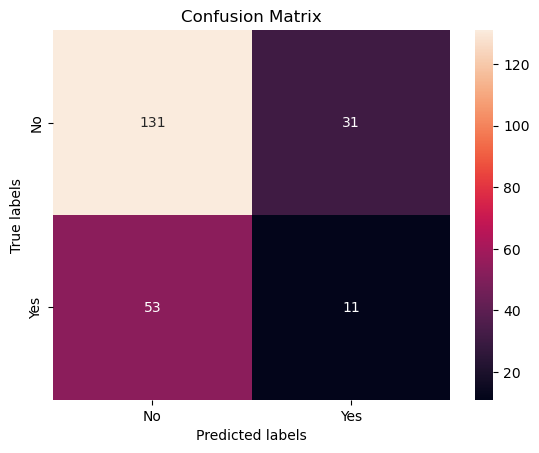

In [19]:
probs= results.predict(exog=test_x)
pred=np.array(['No']*226).astype('<U3')
pred[probs>0.5]='Yes'
cm=confusion_matrix(data.any_prio.loc[~train],pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes'])

Though accuracy of the model is 62.83%, it only prediicts 17% of yes's correctly. 

We will remove the highly insignificant variables in the model and run the regression again.


In [5]:
x1=MS(data.columns.drop(['any_prio','year','polity2l','Oil','gdp_g','gdp_g_l'])).fit_transform(data)
train_x1, test_x1 = x1.loc[train], x1.loc[~train]
train_y,test_y =  y.loc[train],y.loc[~train]     
glm = sm.GLM(train_y,
             train_x1,
             family=sm.families.Binomial())
results1=glm.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               any_prio   No. Observations:                  517
Model:                            GLM   Df Residuals:                      512
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -252.46
Date:                Thu, 16 Nov 2023   Deviance:                       504.92
Time:                        20:19:14   Pearson chi2:                     476.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1579
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -7.8762      0.970     -8.117      0.000      -9.778      -5.974
lpopl1         0.6990      0.126      5.556      0.000       0.452       0.946
lmtnest        0.3892      0.105      3.692      0.000       0.183       0.596
ethfrac        1.1001      0.589      1.869      0.062      -0.053       2.254
relfrac       -1.6334      0.719     -2.273      0.023      -3.042      -0.225
==============================================================================
"""

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

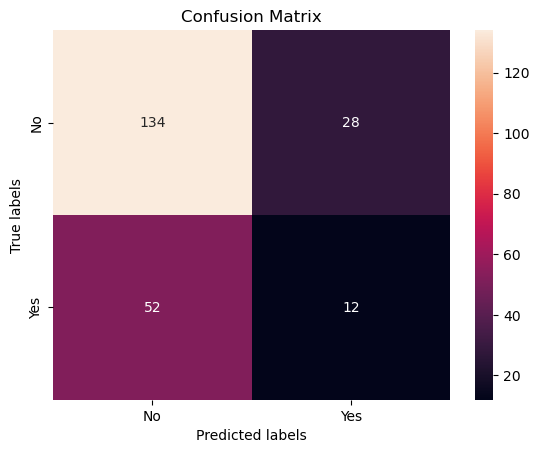

In [6]:
probs1= results1.predict(exog=test_x1)
pred1=np.array(['No']*226).astype('<U3')
pred1[probs1>0.5]='Yes'
cm=confusion_matrix(data.any_prio.loc[~train],pred1)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes'])


In [7]:
'Accuracy : {:.2%}'.format(np.mean(pred1 == data.any_prio.loc[~train])) , 'Accuracy of predicting Yes: {:.2%}'.format(cm[1,1]/(cm[0,1]+cm[1,1]))

('Accuracy : 64.60%', 'Accuracy of predicting Yes: 30.00%')

Despite the fact that the model's accuracy climbed to 64.6%, the independent factors we eliminated play a substantial impact in creating civil unrest in Sub-Saharan Africa. So, we will explore different method and see if we can increase the accuracy with all the variables.

We will start with linear discriminant analysis and then move on to naive bayes and K-Nearest Neighbour Classifier.

### LINEAR DISCRIMINANT ANALYSIS
LDA is a statistical method which reduces the number of variables while retaining all the important information to find the best linear combination of variables that seperates the classes.

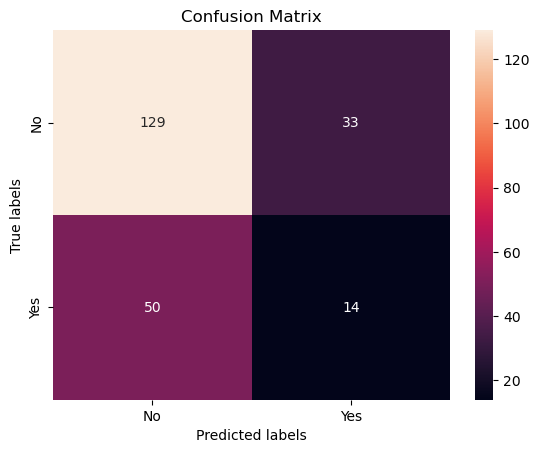

In [23]:
lda_result=LDA(store_covariance=True).fit(train_x,train_y)
lda_pred = lda_result.predict(test_x)
cm=confusion_matrix(test_y,lda_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

In [9]:
'Overall Accuracy : {:.2%}'.format(np.mean(lda_pred == data.any_prio.loc[~train]))

'Overall Accuracy : 63.27%'

In [10]:
'Accuracy of predicting Yes: {:.2%}'.format(cm[1,1]/(cm[0,1]+cm[1,1]))

'Accuracy of predicting Yes: 29.79%'

We can see that number of yes accurately predicted has increased but overall accuracy of the model remained same.

### NAIVE BAYES
Naive Bayes is a simple and probabilistic machine learning algorithm based on Bayes' theorem. It is particularly popular for classification tasks. The "naive" in Naive Bayes stems from the assumption that features used to describe an observation are conditionally independent, given the class label. Despite this simplifying assumption, Naive Bayes often performs well and is computationally efficient.

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

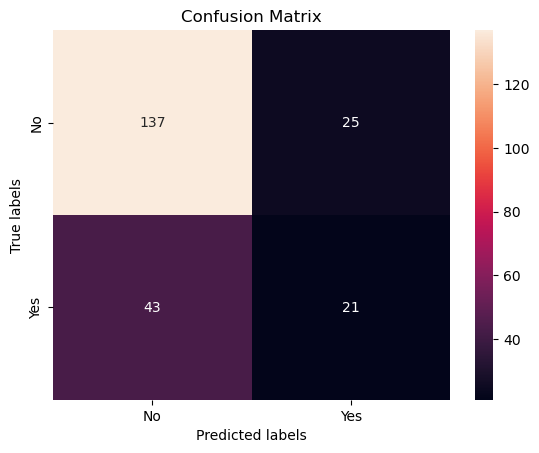

In [24]:
NB = GaussianNB()
NB.fit(train_x,train_y)
nb_pred = NB.predict(test_x)
cm=confusion_matrix(test_y,nb_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes'])

In [12]:
'Overall Accuracy : {:.2%}'.format(np.mean(nb_pred == data.any_prio.loc[~train])),'Accuracy of predicting Yes: {:.2%}'.format(cm[1,1]/(cm[0,1]+cm[1,1]))

('Overall Accuracy : 69.91%', 'Accuracy of predicting Yes: 45.65%')

As we can see prediction of having civil unrest went up by 16% while overall accuracy only increased by 6%.

## K-NEAREST NEIGHBOURS
Lastly, we will use K-Nearest Neighbours method which is simple and  used machine learning algorithm for classification and regression tasks. It's a type of instance-based or lazy learning, where the algorithm memorizes the training dataset and makes predictions for new data points based on their similarity to existing examples. 

Since the KNN classifier predicts the class of a given test
observation by identifying the observations that are nearest to it,
the scale of the variables matters. Any variables that are on a large
scale will have a much larger effect on the *distance* between
the observations, and hence on the KNN classifier, than variables that
are on a small scale.A good way to handle this problem is to *standardize*  the data so that all variables are
given a mean of zero and a standard deviation of one. Then all
variables will be on a comparable scale. Then, this transformation can be fit
and then applied to arbitrary data.

In [13]:
feature_df =data.drop(columns=['any_prio','year'])
scaler = StandardScaler(with_mean=True,
                        with_std=True,
                        copy=True)
scaler.fit(feature_df)
X_std = scaler.transform(feature_df)
feature_std = pd.DataFrame(
                 X_std,
                 columns=feature_df.columns);
feature_std.std()

lpopl1      1.000674
lmtnest     1.000674
Oil         1.000674
ethfrac     1.000674
relfrac     1.000674
polity2l    1.000674
gdp_g       1.000674
gdp_g_l     1.000674
dtype: float64

Now every column of `feature_std` below has a standard deviation of
one and a mean of zero.Notice that the standard deviations are not quite $1$ here; this is again due to some procedures using the $1/n$ convention for variances (in this case `scaler()`), while others use $1/(n-1)$.

we wil now split the observations into a test set at random,
containing 226 observations which is one-third of total observations, and a training set containing the remaining
observations.

In [14]:
(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(np.asarray(feature_std),
                            data.any_prio,
                            test_size=226,
                            random_state=0)


Now we will check for every hyperparameter in range 1 to 6 to see how the classifier performs since we do not know priorly what value to use.

K=1: # predicted to have civilwar: 68,  # how many had 43, accuracy 63.2%
K=2: # predicted to have civilwar: 28,  # how many had 25, accuracy 89.3%
K=3: # predicted to have civilwar: 54,  # how many had 42, accuracy 77.8%
K=4: # predicted to have civilwar: 36,  # how many had 33, accuracy 91.7%
K=5: # predicted to have civilwar: 46,  # how many had 39, accuracy 84.8%


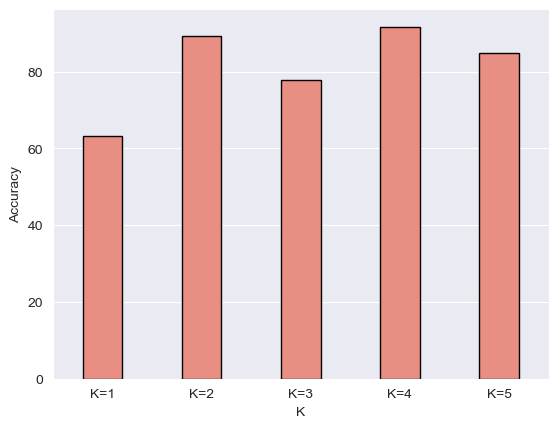

In [43]:
kdf=pd.DataFrame(columns=['K','Accuracy'])
for K in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn_pred = knn.fit(X_train, y_train).predict(X_test)
    C = confusion_table(knn_pred, y_test)
    templ = ('K={0:d}: # predicted to have civilwar: {1:>2},' +
            '  # how many had {2:d}, accuracy {3:.1%}')
    pred = C.loc['Yes'].sum()
    had_war = C.loc['Yes','Yes']
    kdf.loc[K]= ['K='+str(K)] + [(had_war / pred)*100]
    print(templ.format(
          K,
          pred,
          had_war,
          had_war / pred))
sns.set_style('darkgrid')
sns.barplot(x='K',y='Accuracy',data=kdf,width=0.4, color='salmon',edgecolor='black')
plt.show()    

Most of the correct predictions are for k=1 which is far better than any of the methods we used but KNN predicts more accurately when k=4,. The error rate is minimum at k=4 and maximum in k=1.